In [1]:
from keras.preprocessing.image import ImageDataGenerator
# Import TensorFlow
import tensorflow as tf


# Import Numpy and Matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pathlib, os, random
#Import splitfolders
import splitfolders
from keras.preprocessing.image import ImageDataGenerator

In [2]:
data_bs = './natural_images/'
data_bs = pathlib.Path(data_bs)
data_bs

WindowsPath('natural_images')

In [3]:
splitfolders.ratio(data_bs, output='Imgs/', seed=123, ratio=(0.7, 0.15, 0.15), group_prefix=None)

Copying files: 6899 files [00:10, 648.63 files/s]


In [4]:
batch_size = 128
img_height, img_width = 32, 32
input_shape = (img_height, img_width, 3)

datagen = ImageDataGenerator(rescale=1.0 / 255)

train_ds = datagen.flow_from_directory('Imgs/train/', target_size=(img_height, img_width), subset='training', class_mode='sparse', batch_size=batch_size)

test_ds = datagen.flow_from_directory('Imgs/test/', target_size=(img_height, img_width), shuffle=False, class_mode='sparse', batch_size=batch_size)

val_ds = datagen.flow_from_directory('Imgs/val/', target_size=(img_height, img_width), shuffle=False, class_mode='sparse', batch_size=batch_size)

Found 4826 images belonging to 8 classes.
Found 1041 images belonging to 8 classes.
Found 1032 images belonging to 8 classes.


In [5]:
# Create a model object
model = tf.keras.models.Sequential()

In [6]:
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),strides=(1,1),
 padding='same',activation="relu", input_shape=input_shape))

model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),strides=(1,1),
 padding='same',activation="relu", input_shape=input_shape))


model.add(tf.keras.layers.Flatten())

# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))


# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))


In [7]:
# Add the output layer
model.add(tf.keras.layers.Dense(8, activation="softmax"))

In [8]:
# Compile the model
model.compile(optimizer="adam",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])

In [9]:
# Train the model for 50 epochs with batch size of 128
results = model.fit(train_ds, epochs=50, batch_size=batch_size,
validation_data=val_ds)


Epoch 1/50
38/38 [==============================] - 31s 663ms/step - loss: 1.7878 - accuracy: 0.3206 - val_loss: 1.2429 - val_accuracy: 0.6318
Epoch 2/50
38/38 [==============================] - 6s 157ms/step - loss: 1.2331 - accuracy: 0.5634 - val_loss: 0.8183 - val_accuracy: 0.7713
Epoch 3/50
38/38 [==============================] - 6s 158ms/step - loss: 0.9862 - accuracy: 0.6448 - val_loss: 0.6096 - val_accuracy: 0.8149
Epoch 4/50
38/38 [==============================] - 6s 161ms/step - loss: 0.8458 - accuracy: 0.6969 - val_loss: 0.5602 - val_accuracy: 0.8159
Epoch 5/50
38/38 [==============================] - 7s 182ms/step - loss: 0.7711 - accuracy: 0.7174 - val_loss: 0.4691 - val_accuracy: 0.8430
Epoch 6/50
38/38 [==============================] - 6s 153ms/step - loss: 0.6785 - accuracy: 0.7578 - val_loss: 0.3991 - val_accuracy: 0.8566
Epoch 7/50
38/38 [==============================] - 6s 155ms/step - loss: 0.6273 - accuracy: 0.7650 - val_loss: 0.3752 - val_accuracy: 0.8702
Epoch

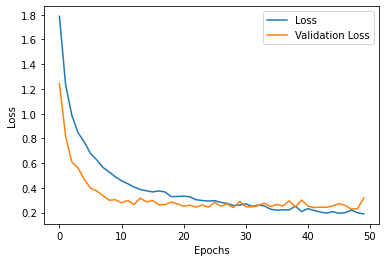

In [10]:
plt.plot(results.history["loss"], label="Loss")

# Plot the the validation loss
plt.plot(results.history["val_loss"], label="Validation Loss")

# Name the x and y axises
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Put legend table
plt.legend()

# Show the plot
plt.show()

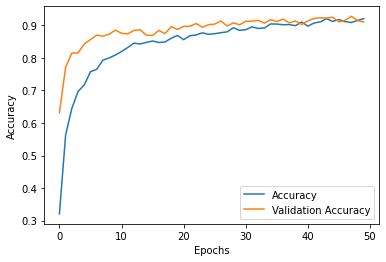

In [11]:
# Plot the the training accuracy
plt.plot(results.history["accuracy"], label="Accuracy")

# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"], label="Validation Accuracy")

# Name the x and y axises
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
# Put legend table
plt.legend()

# Show the plot
plt.show()

In [12]:
# Evaluate the performance
model.evaluate(test_ds)

9/9 [==============================] - 5s 601ms/step - loss: 0.3774 - accuracy: 0.8866


[0.37739765644073486, 0.8866474628448486]